# Image classification on MNIST Fashion dataset

In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

print(tf.__version__)

2.2.0


## Dataset

- The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255.
- The labels are an array of integers, ranging from 0 to 9.

| Label     | Class |
| ----------- | ----------- |
| 0   | T-shirt/top       |
| 1   | Trouser        |
| 2   | Pullover        |
| 3   | Dress        |
| 4   | Coat        |
| 5   | Sandal        |
| 6   | Shirt        |
| 7   | Sneaker        |
| 8   | Bag        |
| 9   | Ankle boot        |

In [39]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data Exploration

In [41]:
print('\n Shape (training-set ):',train_images.shape)
print('\n Shape (testing-set ):',test_images.shape)


 Shape (training-set ): (60000, 28, 28)

 Shape (testing-set ): (10000, 28, 28)


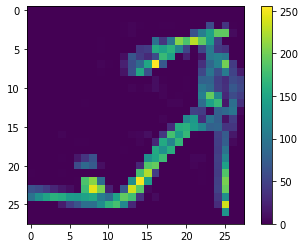

In [24]:
plt.figure()
plt.imshow(train_images[8])
plt.colorbar()
plt.grid(False)
plt.show()

In [25]:
# normalizing pixel values 0-1

train_images = train_images / 255.0
test_images = test_images / 255.0

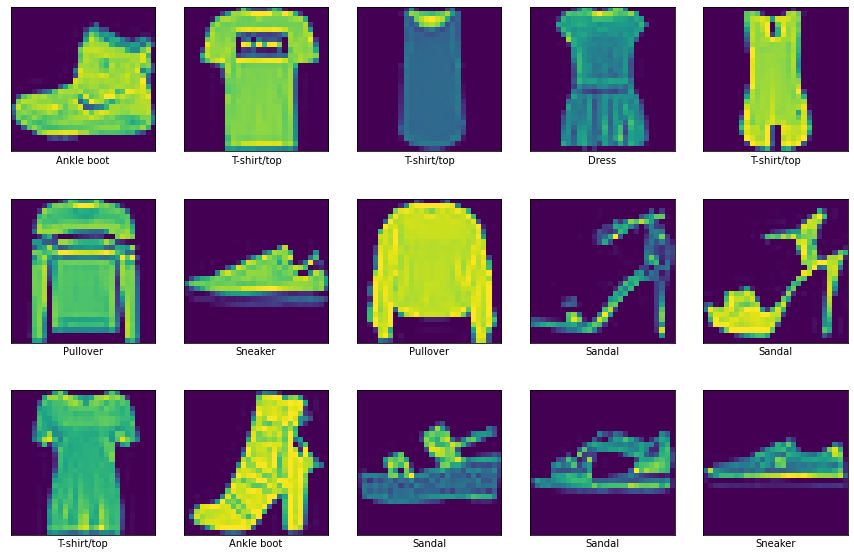

In [37]:
plt.figure(figsize=(15,10))

for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.viridis)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

## Model

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

**Flatten :** 
- 2D (28*28) to 1D 784 pixels

**Dense Layer :** 
- Densly connected layers
- DenseLayer I (128 Neurons)
- DenseLayer II Returns a logits array with length of 10
    - Each node contains a score that indicates the current image belogs to one of the 10 classes

### Model Composition


In [43]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

### Train

In [45]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 876us/step - loss: 0.4547 - accuracy: 0.8464
Epoch 2/10
1875/1875 [==============================] - 2s 807us/step - loss: 0.4442 - accuracy: 0.8492
Epoch 3/10
1875/1875 [==============================] - 2s 803us/step - loss: 0.4531 - accuracy: 0.8471
Epoch 4/10
1875/1875 [==============================] - 2s 806us/step - loss: 0.4474 - accuracy: 0.8512
Epoch 5/10
1875/1875 [==============================] - 2s 800us/step - loss: 0.4382 - accuracy: 0.8536
Epoch 6/10
1875/1875 [==============================] - 1s 796us/step - loss: 0.4349 - accuracy: 0.8534
Epoch 7/10
1875/1875 [==============================] - 1s 785us/step - loss: 0.4278 - accuracy: 0.8544
Epoch 8/10
1875/1875 [==============================] - 1s 790us/step - loss: 0.4385 - accuracy: 0.8522
Epoch 9/10
1875/1875 [==============================] - 1s 766us/step - loss: 0.4328 - accuracy: 0.8556
Epoch 10/10
1875/1875 [==============================] - 1s 768u

### Evaluate

*Overfitting :* accuracy difference  (training set- testing set)

In [63]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5615 - accuracy: 0.8273

Test accuracy: 0.8273000121116638


### Predict

- Logits to Probabilities ( Softmax Layer )

In [64]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

- Prediction is an array of 10 numbers representing 'Models Confidence'
- Label with the higest confidence value

In [65]:
np.argmax(predictions[0])

9

In [66]:
test_labels[0]

9

In [223]:
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.viridis)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('#ebcb8b')
    thisplot[true_label].set_color('#d08770')


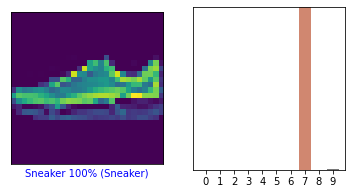

In [224]:
i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

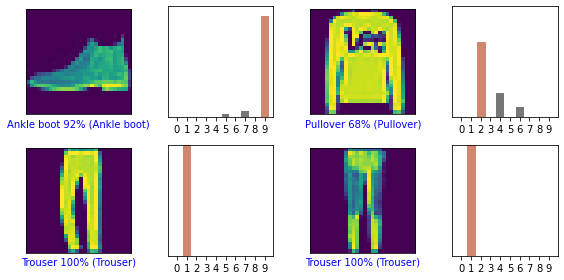

In [225]:
num_rows, num_cols = 2,2
num_images = num_rows * num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Usage

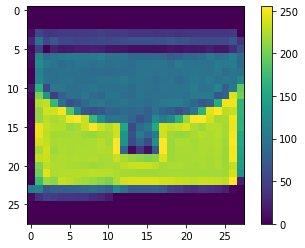


Shape:
 (28, 28)


In [226]:
img = test_images[78]

plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

print('\nShape:\n', img.shape)

In [227]:
# batching images : (in following case - single member of batch )

img = (np.expand_dims(img,0))
print('\nShape:\n', img.shape)


Shape:
 (1, 28, 28)



Predicted label: 8


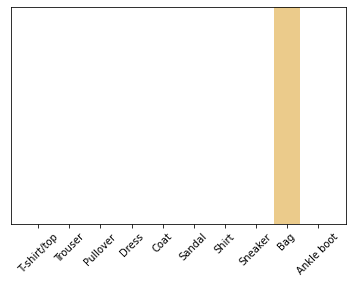

In [228]:
predictions_single = probability_model.predict(img)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

print('\nPredicted label:', np.argmax(predictions_single[0]))

***